<a href="https://colab.research.google.com/github/baveet256/Pytorch-DL/blob/main/Pytorch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [139]:
m = 0.3
b = 0.9
X = torch.arange(0,1,0.01)
y = m * X + b

In [140]:
type(X)

torch.Tensor

torch.Tensor

In [141]:
X[:5], y[:5]

(tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400]),
 tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120]))

In [142]:
# from sklearn.model_selection import train_test_split,
# x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#as keras randomizes the data, due to which we got increased loss values than expected
t = int(0.8*len(X))
x_train,y_train = X[:t],y[:t]
x_test,y_test = X[t:],y[t:]

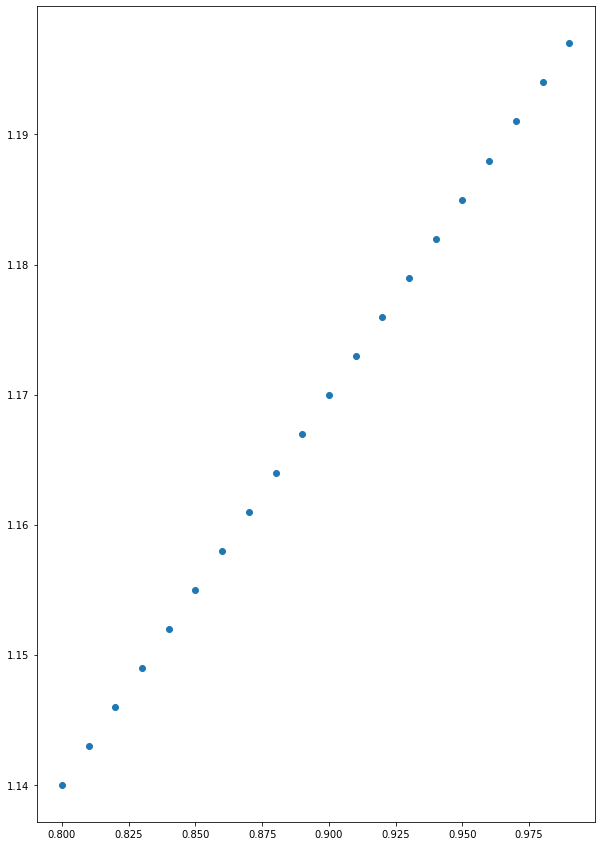

In [143]:
plt.figure(figsize=(10,15))
plt.scatter(x_test,y_test)
plt.show()

In [39]:
from torch import nn

In [134]:
x_train.shape

torch.Size([160])

In [144]:
class Linemodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,requires_grad=True,dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype = torch.float))
  def forward(self,x:torch.tensor):
    return self.weight * x.T + self.bias


In [145]:
torch.manual_seed(42)
model = Linemodel()
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [45]:
#training the model

In [61]:
model.parameters()

<generator object Module.parameters at 0x7f8f4ce3b3d0>

In [146]:
floss = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr = 0.01)


In [147]:
#loops

torch.manual_seed(42)

epochs = 300
for epoch in range(epochs):
  model.train()
  y_pred = model(x_train)
  loss = floss(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #test
  if epoch % 20 == 0:  
    model.eval()
    with torch.inference_mode():
      y_test_pred = model(x_test)
      test_loss  = floss(y_test_pred,y_test) 
      print(f"epoch:{epoch} | loss:{loss} | test_loss:{test_loss}")  


epoch:0 | loss:0.7566978335380554 | test_loss:0.7248174548149109
epoch:20 | loss:0.5254928469657898 | test_loss:0.4541124403476715
epoch:40 | loss:0.2942880392074585 | test_loss:0.18340764939785004
epoch:60 | loss:0.07658576965332031 | test_loss:0.07274086028337479
epoch:80 | loss:0.05255373567342758 | test_loss:0.11581540107727051
epoch:100 | loss:0.045542728155851364 | test_loss:0.10467890650033951
epoch:120 | loss:0.03868866711854935 | test_loss:0.08938358724117279
epoch:140 | loss:0.03183453157544136 | test_loss:0.07408786565065384
epoch:160 | loss:0.024982359260320663 | test_loss:0.0581042543053627
epoch:180 | loss:0.018130185082554817 | test_loss:0.04212062805891037
epoch:200 | loss:0.011278990656137466 | test_loss:0.02579306997358799
epoch:220 | loss:0.004429381340742111 | test_loss:0.009467745199799538
epoch:240 | loss:0.00370177929289639 | test_loss:0.006489443592727184
epoch:260 | loss:0.00370177929289639 | test_loss:0.006489443592727184
epoch:280 | loss:0.00370177929289639 |

In [148]:
y_test[:5],y_pred[:5]

(tensor([1.1400, 1.1430, 1.1460, 1.1490, 1.1520]),
 tensor([0.8911, 0.8941, 0.8971, 0.9001, 0.9032], grad_fn=<SliceBackward0>))